# Mission Analysis and Orbital Mechanics Assignment - Exercise 1
## Exercise 1a)
The solver and other auxilliary calculation functions are in the file "solvers_calculators.py"

In [1]:
import matplotlib.pyplot as plt
from solvers_calculators import *

## Exercise 1b)
"Execute  the  MATLAB  function  “[E]  =  Kepler(M,e,tol)”  created  in  1a,  with  M=21 degrees and e=0.25 as inputs"

In [2]:
# exercise 1b)
M = np.radians(21)
e = 0.25

calculate: "The value of the Eccentric Anomaly after one iteration."

In [3]:
# after one iteration (very high tolerance)
E, _ = kepler(M, e, 9e99)
print(f"E after 1 iteration: {E:.2f} radians = {np.degrees(E):.2f} degrees")

iters=1 E=0.48338767344933065 error=-0.11686853053052142
E after 1 iteration: 0.48 radians = 27.70 degrees


"Number of iterations to reduce the error – “tol” – below 10⁻⁶. "

In [4]:
# number of iterations for error < 10⁻⁶
E, iters = kepler(M, e, 1e-6)
print(f"E and number of iterations for error < 10^(-6): E = {E:.2f} radians = {np.degrees(E):.2f} degrees in {iters} iterations")

iters=1 E=0.48338767344933065 error=-0.11686853053052142
iters=2 E=0.4825231081858618 error=0.0008645652634688337
iters=3 E=0.4825230524373834 error=5.574847837619915e-08
E and number of iterations for error < 10^(-6): E = 0.48 radians = 27.65 degrees in 3 iterations


"Repeat the above, i.e. recalculate eccentric anomaly and number of iterations with tol changed to 10⁻¹²"
"Using  the  result  for  eccentric  anomaly,  calculate  the  true  anomaly  (θ)  and the radial distance r for semi-major axis = 24000 km."

In [5]:
def peinr_eccentric_anomaly_theta_r():
    a = 24000  # km

    # for tol = 10⁻¹²
    E, iters = kepler(M, e)
    print(f"Eccentric anomaly={np.degrees(E):.5f} degrees, computed in {iters} iterations.")

    theta = eccentric_anomaly_to_theta(E, e)
    r = theta_to_r_distance(theta, e, a)
    print(f"True anomaly={np.degrees(theta):.3f} degrees; r = {r:.0f} km")


peinr_eccentric_anomaly_theta_r()

iters=1 E=0.48338767344933065 error=-0.11686853053052142
iters=2 E=0.4825231081858618 error=0.0008645652634688337
iters=3 E=0.4825230524373834 error=5.574847837619915e-08
iters=4 E=0.4825230524373832 error=2.1390392133911778e-16
Eccentric anomaly=27.64653 degrees, computed in 4 iterations.
True anomaly=35.245 degrees; r = 18685 km


"What happens if you repeat calculations for M = 180? What does r represent in this case?" (r is the radial distance at the apogee)

In [6]:
# change M to 180 degrees
M = np.radians(180)
peinr_eccentric_anomaly_theta_r()

iters=1 E=3.141592653589793 error=0.0
Eccentric anomaly=180.00000 degrees, computed in 1 iterations.
True anomaly=180.000 degrees; r = 30000 km


## Exercise 1c)
"compute a MEO satellite orbit, computed every 15 seconds, with the following parameters: At t0 the spacecraft is at perigee Semi-major axis a = 24000 km Eccentricity e = 0.72 "

In [7]:
# orbit parameters
a = 24000
e = 0.72
n = np.sqrt(G_EARTH / np.power(a, 3))  # mean motion
T = 2 * np.pi / n  # period
p = a * (1 - e * e)
print(f"{n} {T=:.3f}")

0.00016980551238707486 T=37002.246


iters=1 E=0.0 error=0.0
iters=1 E=0.009096662164362439 error=-0.006549579478556316
iters=2 E=0.009096401303216114 error=2.608611463244469e-07
iters=3 E=0.009096401303215318 error=7.960294809987355e-16
iters=1 E=0.0181929540607434 error=-0.013098788689131157
iters=2 E=0.01819086801372223 error=2.086047021168418e-06
iters=3 E=0.018190868013620503 error=1.0172922928610818e-13
iters=1 E=0.027288505486745874 error=-0.019647257429327505
iters=2 E=0.027281469810342966 error=7.035676402908592e-06
iters=3 E=0.027281469808608252 error=1.7347115693481656e-12
iters=4 E=0.027281469808608252 error=0.0
iters=1 E=0.0363829463711174 error=-0.02619461562789291
iters=2 E=0.036366284892607355 error=1.6661478510044443e-05
iters=3 E=0.0363662848796484 error=1.295895280339339e-11
iters=4 E=0.0363662848796484 error=0.0
iters=1 E=0.04547590683926128 error=-0.032740493410230664
iters=2 E=0.04544340418539159 error=3.2502653869691723e-05
iters=3 E=0.04544340412382303 error=6.156856136361586e-11
iters=4 E=0.045443

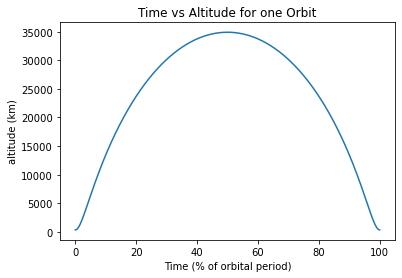

In [8]:
# for one orbit, we compute from 0 to the period:
percts_ts = np.arange(0, T, 15.0)
percts_hs, percts_thetas = ts_to_alts(percts_ts, e, a)

plt.plot(np.divide(percts_ts, T / 100.0), percts_hs)  # divide times by T and * 100 to get percentage
plt.title("Time vs Altitude for one Orbit")
plt.xlabel("Time (% of orbital period)")
plt.ylabel("altitude (km)")
plt.show()

iters=1 E=0.0 error=0.0
iters=1 E=0.009096662164362439 error=-0.006549579478556316
iters=2 E=0.009096401303216114 error=2.608611463244469e-07
iters=3 E=0.009096401303215318 error=7.960294809987355e-16
iters=1 E=0.0181929540607434 error=-0.013098788689131157
iters=2 E=0.01819086801372223 error=2.086047021168418e-06
iters=3 E=0.018190868013620503 error=1.0172922928610818e-13
iters=1 E=0.027288505486745874 error=-0.019647257429327505
iters=2 E=0.027281469810342966 error=7.035676402908592e-06
iters=3 E=0.027281469808608252 error=1.7347115693481656e-12
iters=4 E=0.027281469808608252 error=0.0
iters=1 E=0.0363829463711174 error=-0.02619461562789291
iters=2 E=0.036366284892607355 error=1.6661478510044443e-05
iters=3 E=0.0363662848796484 error=1.295895280339339e-11
iters=4 E=0.0363662848796484 error=0.0
iters=1 E=0.04547590683926128 error=-0.032740493410230664
iters=2 E=0.04544340418539159 error=3.2502653869691723e-05
iters=3 E=0.04544340412382303 error=6.156856136361586e-11
iters=4 E=0.045443

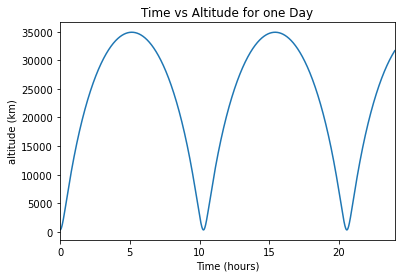

In [9]:
# for one day:
day_ts = np.arange(0, 24 * 3600, 15.0)
day_hs, _ = ts_to_alts(day_ts, e, a)

plt.plot(np.divide(day_ts, 3600.0), day_hs)  # divide times by 3600 to get hours
plt.title("Time vs Altitude for one Day")
plt.xlim([0, 24])
plt.xlabel("Time (hours)")
plt.ylabel("altitude (km)")
plt.show()

If the satellite were at apogee at t0, M would become **M = n * (t-T/2)** where T is the period, instead of **M = n * t**

## Exercise 1d)
Plotting the 2D orbit

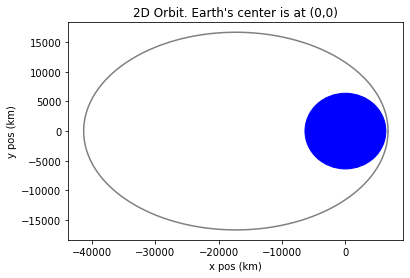

In [10]:
# convert (height, theta) pairs into (x, y)
xs, ys = theta_h_to_x_y(percts_thetas, percts_hs)
plt.plot(xs, ys, color='grey')
plt.xlabel("x pos (km)")
plt.ylabel("y pos (km)")
plt.title("2D Orbit. Earth's center is at (0,0)")
earth = plt.Circle((0, 0), R_EARTH, color='b')
plt.gca().add_patch(earth)
plt.show()

alpha = R_E².e²+p²
beta = 2.R_E².e
gamma = R_E²-p²
alpha.X²+beta.X+gamma=0 (X=cos(theta))
X = (-beta ± sqrt(beta² - 4.alpha.gamma))/(2.alpha)
theta1 = cos⁻¹(X1); theta2 = cos⁻¹(X2)

In [11]:
alpha = R_EARTH * R_EARTH * e * e + p * p
beta = 2 * R_EARTH * R_EARTH * e
gamma = R_EARTH * R_EARTH - p * p
b = np.sqrt(beta * beta - 4 * alpha * gamma)
X1 = (-beta + b)/(2 * alpha)
X2 = (-beta - b)/(2 * alpha)
theta1 = np.arccos(X1)
theta2 = np.arccos(X2)

New plot with eclipse beginning and ending points

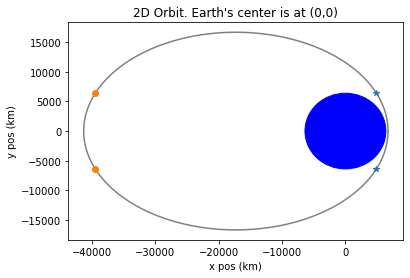

In [12]:
# convert (height, theta) pairs into (x, y)
xs, ys = theta_h_to_x_y(percts_thetas, percts_hs)

# eclipse points
# eclipse at periapsis
p_e_xs, p_e_ys = theta_to_x_y(np.array([-theta1, theta1]), e, a)
# eclipse at apoapsis
a_e_xs, a_e_ys = theta_to_x_y(np.array([-theta2, theta2]), e, a)

plt.plot(xs, ys, color='grey')
plt.plot(p_e_xs, p_e_ys, '*')
plt.plot(a_e_xs, a_e_ys, 'o')
plt.xlabel("x pos (km)")
plt.ylabel("y pos (km)")
plt.title("2D Orbit. Earth's center is at (0,0)")
earth = plt.Circle((0, 0), R_EARTH, color='b')
plt.gca().add_patch(earth)
plt.show()

Using  Equations  (7,8,9)  find  the  Eccentric  Anomalies  and  via  the  Mean Anomalies compute the eclipse time (in minutes) spent by the satellite over one  orbit  for  each  of  the  two  cases.  Compare  these  times  and  discuss  the result.

In [13]:
delta_t_1 = delta_theta_to_delta_t(-theta1, theta1, e, a) / 60.0
delta_t_2 = delta_theta_to_delta_t(-theta2, theta2, e, a) / 60.0

print(f"Time in eclipse at periapsis: {delta_t_1:.3f} minutes")
print(f"Time in eclipse at apoapsis: {delta_t_2:.3f} minutes")

Time in eclipse at periapsis: 23.018 minutes
Time in eclipse at apoapsis: 485.438 minutes
